<a href="https://colab.research.google.com/github/Maorvg/wine-not-/blob/main/Fun_with_wine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [166]:
import pandas as pd
from collections import Counter
from numpy import random
import matplotlib.pyplot as plt
import statistics 




In [4]:
df=pd.read_csv('/content/drive/MyDrive/winemag-data-130k-v2.csv')
small_df1=df[['points','taster_name']].fillna("I don't know")
small_df2=df[['points','taster_name','variety']].fillna("I don't know")



If I were to go to a dinner party with any one of these tasters, I ought to know which is their favourite wine

In [ ]:
df_grouped=small_df1.groupby('taster_name').agg({'points':max}).reset_index()
tasters={}
for guy,score in zip(df_grouped['taster_name'],df_grouped['points']):
  tasters[guy]=score

print('Who is having you over for a party?')
print(list(tasters.keys()))
selected=str(input())
filt=((small_df2['points']==tasters[selected]) & (small_df2['taster_name']==selected))
recommended=set(small_df2.loc[filt,'variety'])

print("If so, you'd better bring one of these: ",recommended)

Information about the wines from the Country with the most highest rated wines

In [ ]:
t2_df=df[['country','points','winery','designation']].fillna('unknown')
t2_df=t2_df.sort_values(by=['points'],ascending=False) #for viewing comfort
grouped_df=t2_df.groupby('points').agg({
    'country':lambda x: list(x),
    }
    ).reset_index()
best_country=Counter(grouped_df.loc[grouped_df.index[-1],'country']).most_common()[0][0]
filt=(df['country']==best_country) & (df['points']==df['points'].max())
df[filt]

Checking how different tasters rate and describe the same wine

In [195]:
#I decided to take a random wine which each time that has exactly 2 descriptions in order to compare the descriptions.


all=dict(Counter(df['title'].fillna('unknown')))
wines=[]
for wine in all:
 
  if (all[wine]==2):
    filt=df['title']==wine
    a=df.loc[filt,'description'][:1]
    b=df.loc[filt,'description'][1:2]
    if a.values != b.values:
      wines.append(wine)

pick=random.randint(len(wines))
filt=df['title']==wines[pick]
pd.set_option("display.max_colwidth", -1)
print(df.loc[filt,'description'])



122235    This soft, fruity wine is pretty much ready to drink. With its red-berry fruits and fresh acidity it has a crisp side, although its round, ripe texture is so attractive. Drink from the end of 2016.        
127915    This wine is structured, firm and has a mineral, tight texture. It also offers plenty of red apples, green plums and a touch of apricot. However, with its nervy edge the wine needs to age; drink from 2017.
Name: description, dtype: object


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.


After several runs of the cell above you can clearly state that either one of these statments is true:
  - Critics have no idea what they are talking about.
  - Every person has a different pallet and prefrences.

Whether one or both is true, the conclusion is clear: There is no objectivly good wine so just drink the wine YOU like.


I will check the connection between the price of the wine and its rating

In [ ]:
df_grouped=df[['points','price']].dropna()

df_grouped=df_grouped.groupby('points').agg({'price':lambda x:list(x)})
df_grouped['avg_price']=df_grouped['price'].apply(lambda x: statistics.mean(x))
df_grouped['range_cof']=df_grouped['price'].apply(lambda x:max(x)-min(x))




We would expect as a wines rating goes up, Its avg price should go up with it 

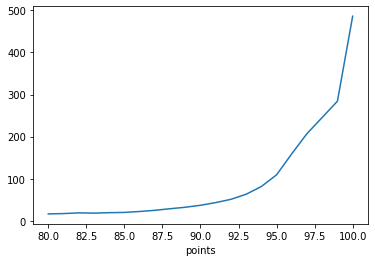

In [177]:
df_grouped['avg_price'].plot()

while we see this is true, we are not taking into account the fact that there might be vast price ranges for each score

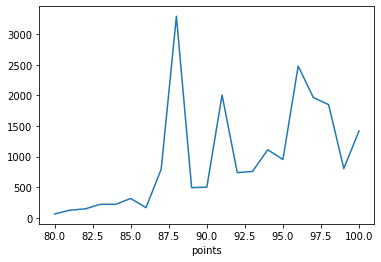

In [178]:
df_grouped['range_cof'].plot()

While expecting this line to curve downwards ( by the logic that a highly rated wine has a more wildley accepted value than a low or mid-range wine), the graph is chaotic and tilts upwards

To reveal the true nature of the relationship between price and rating I will combine the two graphs in the following manner:

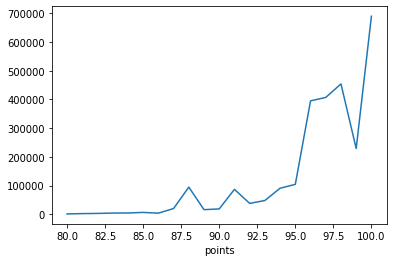

In [180]:
df_grouped['value_score']=df_grouped['avg_price']*df_grouped['range_cof']
df_grouped['value_score'].plot()

this graph shows us how 'stable'  a wines price is. the larger the value the bigger the price range.
In conclusion there seems to be an uneaven corolation between a wines rating and its price, generally speaking you'd probably get the best deal for buying a wine in the 92-95 rating range. 